# Exploratory Data Analysis for OpenPersonality Data

This notebook is an extensive exploration of the variables in the OpenPersonality dataset.  While mainly an exploration, new variables will be created and bad data removed of the course of this notebook.  At the end, the transformed dataset will be saved so that it can be loaded in further notebooks where the models will be built.  The data can be downloaded from [here](http://openpsychometrics.org/_rawdata/16PF.zip) if desired.

## Table of Contents
- [Variable Overview](#vars)
- [Load and View Data](#load_and_view)
- [Missing Values](#missing_vals)
- [Removing Invalid Data](#invalid)
- [Exploring the Features - Correlation Matrix](#corr_mat)
- [Exploring the Variables - Histograms](#hist)
- [Exploring the Features - Countries of Origin](#country_cloud)
- [Normalizing Continuous Numeric Variables](#norm_vars)
- [Feature / Gender Crosstab](#gender_cross)
- [Feature / Source Crosstab](#source_cross)
- [Feature / Age Crosstab](#age_crosstab)
- [Feature / Country Crosstab](#country_cross)
- [Saving the Data](#save)

<a id="vars"></a>
## Variable Overview

There are way, way, way too many variables to list individually, so a general overview will be given in the following table.  For a comprehensive description of all variables, please view personality_variables.html

 <table style="font-size: 16px; text-align: left;" width=100%>
  <tr>
  <td width=5% style="text-align: center; font-size: 16px">
      <b>Columns</b>
   </td>
   <td width=11% style="text-align: left; font-size: 16px">
   <b>Variables</b>
   </td>
   <td width=53% style="text-align: left; font-size: 16px">
   <b> Description</b>
  </tr>
  <tr>
   <td width=5% style="text-align: center; font-size: 16px">
    0 - 162
   </td>
   <td width=11% style="text-align: left; font-size: 16px">
     A1 - P10 
   </td>
   <td width=53% style="text-align: left; font-size: 16p">
       Personality features.  Each variable represents the answer to a specific personality question.
       (0: missing answer,1: strongly agree, 2: disagree, 3: neither agree not disagree, 4: agree, 5: strongly agree)
   </td>
  
 </tr>
 <tr>
   <td style="text-align: center; font-size: 16px">
   163
  </td>
  <td style="text-align: left; font-size: 16px">
   COUNTRY
  </td>
  <td style="text-align: left; font-size: 16px">
   Country of tester (ISO 3166 country codes)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
   164
  </td>
  <td style="text-align: left; font-size: 16px">
  SOURCE
  </td>
  <td  style="text-align: left; font-size: 16px">
  Source leading tester to website
      (1: front page of website that hosted the survey, 2: google, 3: facebook, 4: url containing ".edu", 5: wikipedia, 6: other source or empty source)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
  165 
  </td>
  <td style="text-align: left; font-size: 16px">
  ACCURACY
  </td>
  <td style="text-align: left; font-size: 16px">
  Tester's perception of their accuracy on questions (integer range from 0 to 100)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
  166 
  </td>
  <td style="text-align: left; font-size: 16px">
  ELAPSE
  </td>
  <td style="text-align: left; font-size: 16px">
  Time in seconds it took tester to complete test (integer greater than 0)
  </td>
 </tr>
 <tr>
  <td style="text-align: center; font-size: 16px">
   167
  </td>
  <td style="text-align: left; font-size: 16px">
  AGE
  </td>
  <td style="text-align: left; font-size: 16px">
  Age of tester in years (integer greater than 13)
  </td>
 </tr>
  <tr>
  <td style="text-align: center; font-size: 16px">
   168
  </td>
  <td style="text-align: left; font-size: 16px">
  GENDER
  </td>
  <td style="text-align: left; font-size: 16px">
  Gender of tester (0: not answered, 1: male, 2: female, 3: other)
  </td>
 </tr>
</table>

<a id="load_and_view"></a>
## Load and View Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Data/Datasets/Random/Personality/data/data.csv', sep='\t', encoding='utf-8')
df.head()

A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  P7  P8  P9  P10  age  gender  \
0   1   4   2   3   3   2   3   4   4    3  ...   1   2   5    2   17       1   
1   4   3   4   3   4   4   4   4   2    2  ...   3   2   2    2   37       1   
2   3   4   4   4   4   4   4   3   2    2  ...   2   3   3    3   31       1   
3   4   5   4   4   4   3   3   2   2    2  ...   2   3   4    4   32       1   
4   4   0   4   4   4   3   5   1   2    4  ...   4   2   3    2   46       2   

   accuracy  country  source  elapsed  
0        92       US       6      914  
1       100       US       1      891  
2        80       US       6      903  
3        93       US       1      806  
4        87       NZ       1     1826  

[5 rows x 169 columns]

The main thing to consider here is that that all variables beginning with A - P are answers to specific questions asking about a person's behavior or personality.  The final few columns all contain demographic information about the person taking the test or an assesment of their test taking.  Over the course of a few notebooks, the plan is to analyze and build multiple models to predict demographic information from answers to personality questions.  Will we succeed? <br/><center>**M A Y B E**</center>

In [3]:
print("#Rows, #Columns: "+str(df.shape))
df.source = df.source-1 #Just to make it easier to format with other categorical variables when plotting
df.gender = df.gender.astype('category')
df.country = df.country.astype('category')
df.source = df.source.astype('category')
non_features = ['age', 'gender', 'accuracy', 'country', 'source', 'elapsed']

#Rows, #Columns: (49159, 169)


So there are over 49k datapoints in this set over 169 columns.  Six of the columns are the various labels and the other 163 columns are the features we will use, representing answers to personality questions.  All of the personality feature variables are ordinal so we will keep them as integer encoded for now

<a id="missing_vals"></a>
## Missing Values

In [4]:
df.describe()

A1            A2            A3            A4            A5  \
count  49159.000000  49159.000000  49159.000000  49159.000000  49159.000000   
mean       3.649566      3.791513      3.799121      3.633495      3.828495   
std        1.140966      1.059120      1.104136      1.067361      0.992537   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      4.000000      4.000000      4.000000      4.000000   
75%        4.000000      4.000000      5.000000      4.000000      4.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

                 A6            A7            A8            A9           A10  \
count  49159.000000  49159.000000  49159.000000  49159.000000  49159.000000   
mean       3.670376      3.869871      2.960658      2.140463      2.428853   
std        0.976063      0.964952      1.165763      1.043318      1.079312   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      4.000000      2.000000      1.000000      2.000000   
50%        4.000000      4.000000      3.000000      2.000000      2.000000   
75%        4.000000      4.000000      4.000000      3.000000      3.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

       ...            P4            P5            P6            P7  \
count  ...  49159.000000  49159.000000  49159.000000  49159.000000   
mean   ...      3.107529      2.601518      3.095486      2.796823   
std    ...      1.139767      1.019074      1.155755      1.169098   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      2.000000      2.000000      2.000000      2.000000   
50%    ...      3.000000      3.000000      3.000000      3.000000   
75%    ...      4.000000      3.000000      4.000000      4.000000   
max    ...      5.000000      5.000000      5.000000      5.000000   

                 P8            P9           P10           age      accuracy  \
count  49159.000000  49159.000000  49159.000000  4.915900e+04  4.915900e+04   
mean       2.931020      3.643829      3.463964  4.371320e+04  4.764119e+04   
std        1.209906      1.103671      1.119474  9.685640e+06  9.704611e+06   
min        0.000000      0.000000      0.000000  1.300000e+01  1.000000e+00   
25%        2.000000      3.000000      3.000000  1.800000e+01  8.500000e+01   
50%        3.000000      4.000000      4.000000  2.100000e+01  9.000000e+01   
75%        4.000000      4.000000      4.000000  3.000000e+01  9.700000e+01   
max        5.000000      5.000000      5.000000  2.147484e+09  2.147484e+09   

            elapsed  
count  4.915900e+04  
mean   2.506205e+03  
std    5.082819e+04  
min    5.000000e+00  
25%    5.840000e+02  
50%    7.540000e+02  
75%    1.045000e+03  
max    8.534589e+06  

[8 rows x 166 columns]

In [5]:
df.describe(include=['category'])

gender country  source
count    49159   49142   49159
unique       4     159       6
top          2      US       0
freq     29183   23988   22884

Looking at this, it's clear that *country* is the only variable with missing values.  However, looking at the variable descriptions tells us that a 0 value means the question was not answered.  Counting these zeros for every column, we get:

Number of missing entries per column: 
    A1   A2   A3   A4   A5   A6   A7   A8   A9  A10  ...   P1   P2   P3   P4  \
0  702  730  617  725  458  515  324  714  754  586  ...  602  454  533  701   

    P5   P6   P7   P8   P9  P10  
0  670  622  548  490  380  566  

[1 rows x 163 columns]

Maximum missing values of all rows: 814

Minimum missing values of all rows: 324


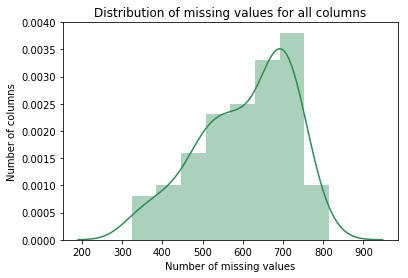

In [6]:
missing_dict = {}

for colname, col in df.iloc[:,:-6].iteritems():
    num_zeros = col.value_counts()[0]
    missing_dict[colname]=[num_zeros]

missing_for_columns = pd.DataFrame(missing_dict)

print("Number of missing entries per column: ")
print(missing_for_columns)
print("\nMaximum missing values of all rows: "+str(missing_for_columns.max(axis=1)[0]))
print("\nMinimum missing values of all rows: "+str(missing_for_columns.min(axis=1)[0]))

sns.distplot(missing_for_columns, color='seagreen')
plt.xlabel("Number of missing values")
plt.ylabel("Number of columns")
plt.title("Distribution of missing values for all columns");

So, every column is missing between 105 and 588 values, which isn't much *at all* considering there are 49k rows of data.  Will leave 0 now for the EDA but this is something to keep in mind when model building.  If using integer encoding then imputation of the mode value is probably the best bet but if we decide to one-hot encode each column then it may be suitable to leave it as is.

<a id="invalid"></a>
## Detecting and Removing Invalid Entries

Digging into the data itself shows a number of rows that have the same answer for every personality question.  This analysis will make the assumption that an individual tester's answers are invalid if the "majority" of their answers are the same value.  This would indicate that someone just went through the test clicking the same answer the whole time without putting thought and attention into their answers.

In [7]:
from scipy.stats import mode

def match_list(int_list, match_int):
    '''
    Takes a list of values and returns another list.  The returned
    list has a 0 for each element if the original element is not equal to
    match_int and equals 1 if they are equal.
    '''
    matching = []
    for num in int_list:
        if num == match_int:
            matching.append(1)
        else:
            matching.append(0)
    return matching

def eval_sameness(row):
    '''
    Calculates a metric of "sameness" for a given row.
    
    This metric is defined as the percentage of elements in the row
    that match the mode value of the entire row.
    '''
    row_length = len(row)
    mode_val = mode(row)[0][0]
    matches_mode = match_list(row, mode_val)
    total_matching = float(sum(matches_mode))
    return (total_matching/row_length)

def invalid_rows(df, sameness_pct):
    '''
    Takes a dataframe and a minimum sameness threshold and
    returns a list of rows that have a sameness value greater than the
    given minimum sameness threshold.
    '''
    invalid_rows = []
    for row_index in range(len(df)):    
        row_features = df.iloc[row_index,:-6].tolist()
        row_sameness = eval_sameness(row_features)
        if row_sameness >= sameness_pct:
            invalid_rows.append(row_index)
    return invalid_rows

In [8]:
max_sameness = 0.95
invalid = invalid_rows(df, max_sameness)
old_df_size = len(df)
df = df.drop(invalid)
new_df_size = len(df)
size_diff = old_df_size-new_df_size
print("There were {} rows of data removed that had a sameness measure greater than {}".format(size_diff, max_sameness))

There were 380 rows of data removed that had a sameness measure greater than 0.95


<a id="corr_mat"></a>
## Exploring the Features - Correlation Matrix

In [9]:
corr_matrix = df.drop(['age', 'gender', 'accuracy', 'country', 'source', 'elapsed'], axis=1).corr(method ='pearson')
corr_matrix.head(30)

A1        A2        A3        A4        A5        A6        A7  \
A1   1.000000  0.472544  0.470351  0.408978  0.481496  0.491047  0.362161   
A2   0.472544  1.000000  0.388432  0.429758  0.442108  0.435030  0.377054   
A3   0.470351  0.388432  1.000000  0.395742  0.324477  0.349258  0.347629   
A4   0.408978  0.429758  0.395742  1.000000  0.301022  0.312548  0.368080   
A5   0.481496  0.442108  0.324477  0.301022  1.000000  0.508072  0.375962   
A6   0.491047  0.435030  0.349258  0.312548  0.508072  1.000000  0.345163   
A7   0.362161  0.377054  0.347629  0.368080  0.375962  0.345163  1.000000   
A8  -0.185902 -0.142342 -0.183456 -0.249037 -0.182554 -0.130571 -0.211013   
A9  -0.292271 -0.316005 -0.307290 -0.426297 -0.306710 -0.262738 -0.363810   
A10 -0.169096 -0.150705 -0.185211 -0.158666 -0.162675 -0.144278 -0.232263   
B1   0.178815  0.204803  0.146579  0.182857  0.077808  0.155731  0.048956   
B2   0.062835  0.042501  0.028397  0.044092  0.008157  0.058328 -0.042740   
B3   0.094630  0.099876  0.129535  0.092468  0.014622  0.103758  0.032054   
B4   0.132660  0.131340  0.100556  0.100047  0.090080  0.203762  0.070834   
B5   0.181443  0.177843  0.103261  0.138691  0.089010  0.155995  0.054944   
B6   0.052386  0.074444  0.011826  0.094054 -0.023584  0.001226 -0.048457   
B7   0.120105  0.113085  0.127220  0.089401  0.005822  0.105257  0.057306   
B8   0.113792  0.130332  0.099196  0.111126  0.069602  0.156776  0.101766   
B9   0.063554  0.086207  0.082498  0.091561  0.018963  0.032191  0.089975   
B10 -0.025947  0.015683  0.077196  0.049138 -0.052628 -0.092395 -0.030602   
B11 -0.119903 -0.102370 -0.039886 -0.045014 -0.133224 -0.136363 -0.003566   
B12 -0.033668  0.026299  0.017426 -0.018336 -0.035143 -0.049563 -0.030539   
B13 -0.002183  0.028247  0.036027  0.012414  0.013925  0.001488  0.005913   
C1   0.076833  0.092871 -0.021474  0.041483  0.123738  0.139717  0.057460   
C2   0.210966  0.207557  0.086827  0.096223  0.198113  0.271942  0.100056   
C3   0.235774  0.232216  0.091201  0.153496  0.167177  0.228227  0.110200   
C4   0.148810  0.180774  0.041663  0.101287  0.182278  0.237317  0.091198   
C5   0.112433  0.113775  0.028114  0.035218  0.160892  0.176632  0.102725   
C6  -0.027281 -0.032181  0.094124  0.008819 -0.097309 -0.124435 -0.077906   
C7  -0.087618 -0.109998  0.060813 -0.018737 -0.190158 -0.181663 -0.095195   

           A8        A9       A10  ...        P1        P2        P3  \
A1  -0.185902 -0.292271 -0.169096  ... -0.113058 -0.097641 -0.109412   
A2  -0.142342 -0.316005 -0.150705  ... -0.113557 -0.104443 -0.096457   
A3  -0.183456 -0.307290 -0.185211  ... -0.022486 -0.034876 -0.076077   
A4  -0.249037 -0.426297 -0.158666  ... -0.062134 -0.084843 -0.064508   
A5  -0.182554 -0.306710 -0.162675  ... -0.164883 -0.134311 -0.146720   
A6  -0.130571 -0.262738 -0.144278  ... -0.182672 -0.154777 -0.136577   
A7  -0.211013 -0.363810 -0.232263  ... -0.139429 -0.128695 -0.160791   
A8   1.000000  0.333455  0.189714  ...  0.094877  0.046680  0.056505   
A9   0.333455  1.000000  0.282019  ...  0.216923  0.191964  0.204245   
A10  0.189714  0.282019  1.000000  ...  0.166460  0.126406  0.211648   
B1   0.009552 -0.011493 -0.023910  ...  0.012934 -0.029676  0.060159   
B2   0.025820  0.085642  0.072805  ...  0.090279  0.043979  0.135564   
B3   0.039971  0.020456  0.003485  ...  0.051997  0.010669  0.095718   
B4   0.044477 -0.031213 -0.035694  ... -0.063231 -0.081573  0.011625   
B5   0.047981  0.009808 -0.012230  ... -0.056230 -0.073091  0.013222   
B6   0.016727  0.092084  0.065571  ...  0.136806  0.120622  0.165548   
B7   0.098108  0.010229 -0.049591  ... -0.121753 -0.163281 -0.050750   
B8   0.026386 -0.053327 -0.048158  ... -0.086002 -0.099117 -0.008331   
B9   0.085715  0.029985  0.028352  ...  0.059235  0.038076 -0.026265   
B10  0.074118  0.111319  0.114586  ...  0.323140  0.266261  0.131170   
B11  0.061820  0.095062  0.071395  ...  0.122487  0.107776  0.019514   
B12  0.073705  0.117767  0.109754  ... 

The correlation matrix is massive.  Only the first 30 rows are shown and it's still too large and clunky to be useful for visual inspection, so it is plotted as a matrix image instead.

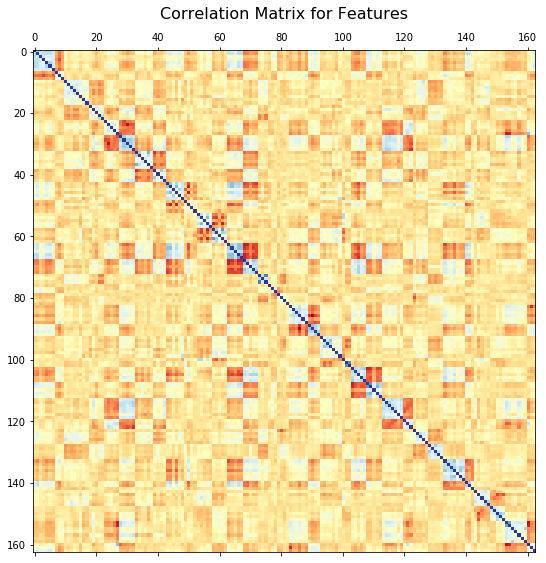

In [10]:
f = plt.figure(figsize=(12, 9))
plt.matshow(corr_matrix, fignum=f.number, cmap='RdYlBu')
plt.title('Correlation Matrix for Features', fontsize=16);

The correlation heatmap looks pretty uniform throughout, indicating collinearity shouldn't be a huge problem.  Interestingly, correlation diverges most from zero around the identity line in the plot--indicating that features near each other are either very similar or very dissimilar to each other.  From a psychological perspective this makes sense, as the question currently being viewed has been primed by the value selected for the previous question.  This may be a useful fact to take into consideration when feature engineering.

<a id="hist"></a>
## Exploring the Features - Histograms

In [11]:
# This code section just defines multiple functions that are used to simplify the process of graphing hundreds of histograms
# It looks like a bunch of gobbledygook because it is.


def multi_hists(df, plot_cols, title, fig_wide=16, fig_height=12, title_size=22, title_dist=0.9, 
                color='orange', ec='maroon', ec_width=4, bins=None, outliers=None, quant_cutoff=0.95, rotate_xlabels=False):
    '''
    Plots all of the columns of a dataframe as subplots
    
    df:              dataframe to plot columns for
    title:           title of group of plots
    fig_wide:        figure width
    fig_height:      figure height
    title_size:      title size
    title_dist:      adjusts title distance from subplots
    color:           inside color of bars
    ec:              outline color of bars
    ec_width:        width of outline color
    bins:            list of bin lists, 1 needed for each column in df
    outliers:        removes all datapoints outside of *outliers* standard deviations from mean
    quant_cutoff:    sets quantile cutoff limit prior to selecting outliers.  Used to ensure mega massive
                     outliers do not significantly increase mean and standard deviation before calculating outliers
    rotate_xlabels:  rotate x-axis labels sideways
    '''
    size = df.shape[1]
    if not bins:
        bins = n_lists(None, size)
    row_num = int(np.ceil(size/plot_cols))
    fig = plt.figure(figsize=(fig_wide,fig_height))
    plt.axis('off')
    plt.suptitle(title, fontsize=title_size)
    for i, name in enumerate(df):
        if outliers:
            x_data = remove_outliers(df[name], outliers, quant_cutoff=quant_cutoff)
        else:
            x_data = list(df[name])
        ax=fig.add_subplot(row_num,plot_cols,i+1)
        if rotate_xlabels:
            plt.xticks(rotation=90)
        plt.hist(x_data, color=color, ec=ec, bins=bins[i], linewidth=ec_width)
        ax.set_title(name)
    plt.tight_layout(w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(top=title_dist)
    plt.show()

def quant_cut(df, quant_cutoff, quant_min=None):
    '''
    Takes a DataFrame df and returns a DataFrame with values only between quant_min
    and quant_cutoff quantiles.  If quant_min is None, only sets upper limit
    '''
    quant_cutoff = float(df.quantile([quant_cutoff]))
    if not quant_min:
        quant_min = df.min()
    else:
        quant_min = float(df.quantile([quant_min]))
    return pd.DataFrame([x for x in df if quant_min<=x<=quant_cutoff])

def remove_outliers(df, z_score, min_quant=None, quant_cutoff=None, remove_zeros=True):
    '''
    Takes a DataFrame df and max z_score and returns a list of all elements in df that
    have a z_score smaller than the max z_score.
    
    min_quant and quant_cutoff both allow you to cutoff extremely large outliers
    
    remove_zeros:  If True, remove zeros from returned list
    '''
    try:
        if quant_cutoff:
            df_cut = quant_cut(df, quant_cutoff, min_quant)
        m = float(df_cut.mean(skipna=True))
        s = float(df_cut.std(skipna=True))
        if remove_zeros:
            outlier_list = [x for x in df if (abs((x-m)/s)<=z_score and x>0)]
        else:
            outlier_list = [x for x in df if abs((x-m)/s)<=z_score]
    except:
        outlier_list = list(df)
    return outlier_list

def gen_col_list(letter_list, length=10):
    '''
    Quick function to generate a list of sequential columns from this massive weirdo dataset
    '''
    col_list = []
    if type(length)!=list:
        length=[length]*len(letter_list)
    for letter_index in range(len(letter_list)):
        for i in range(length[letter_index]):
            col_list.append(letter_list[letter_index]+str(i+1))
    return col_list  

def n_lists(nlist, n):
    '''
    Multiples a list n times inside a list
    '''
    return [nlist for _ in range(n)]

# create two lists that will be used to bin the features in the graphs below
top_feat_bins = n_lists([0,1,2,3,4,5,6], 43)
feat_bins = n_lists([0,1,2,3,4,5,6], 40)

Below we will plot a histogram for *all* of the features.  Plotting all 163 features is a lot of features to plot and this is really only for curiosity's sake.

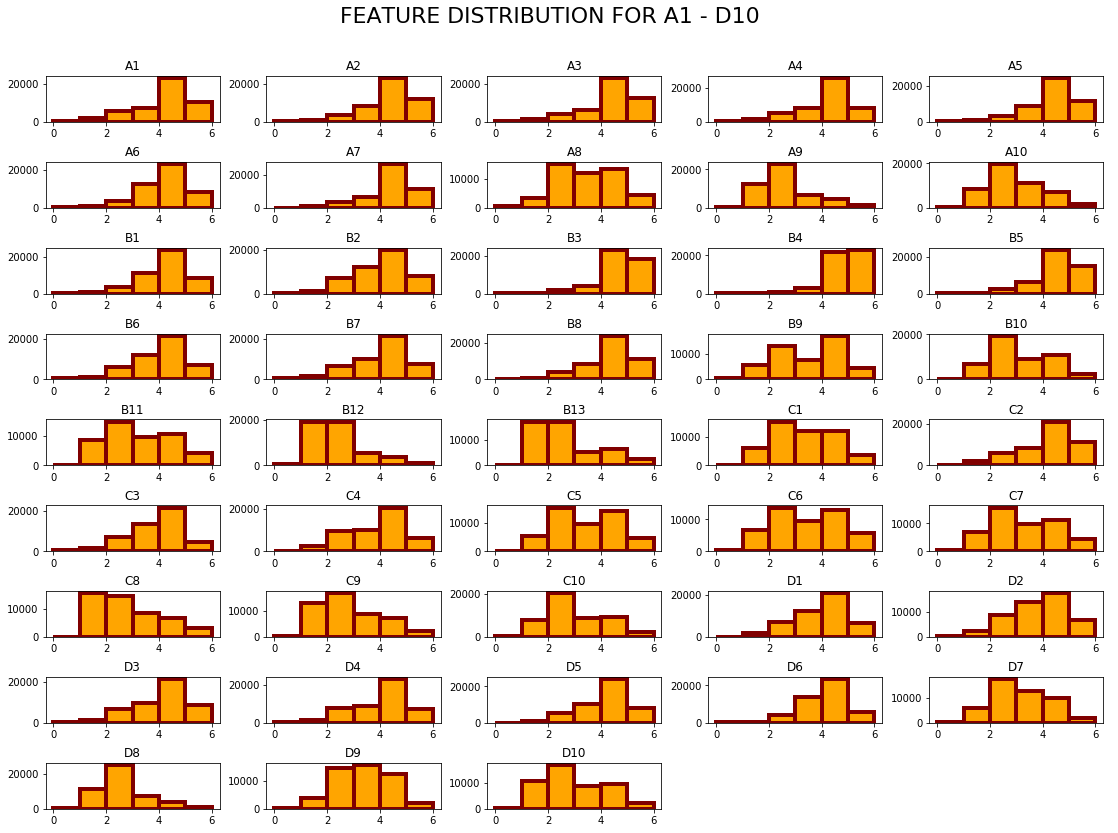

In [12]:
multi_hists(df[gen_col_list('ABCD', [10,13,10,10])], 5, 'FEATURE DISTRIBUTION FOR A1 - D10', bins=top_feat_bins)

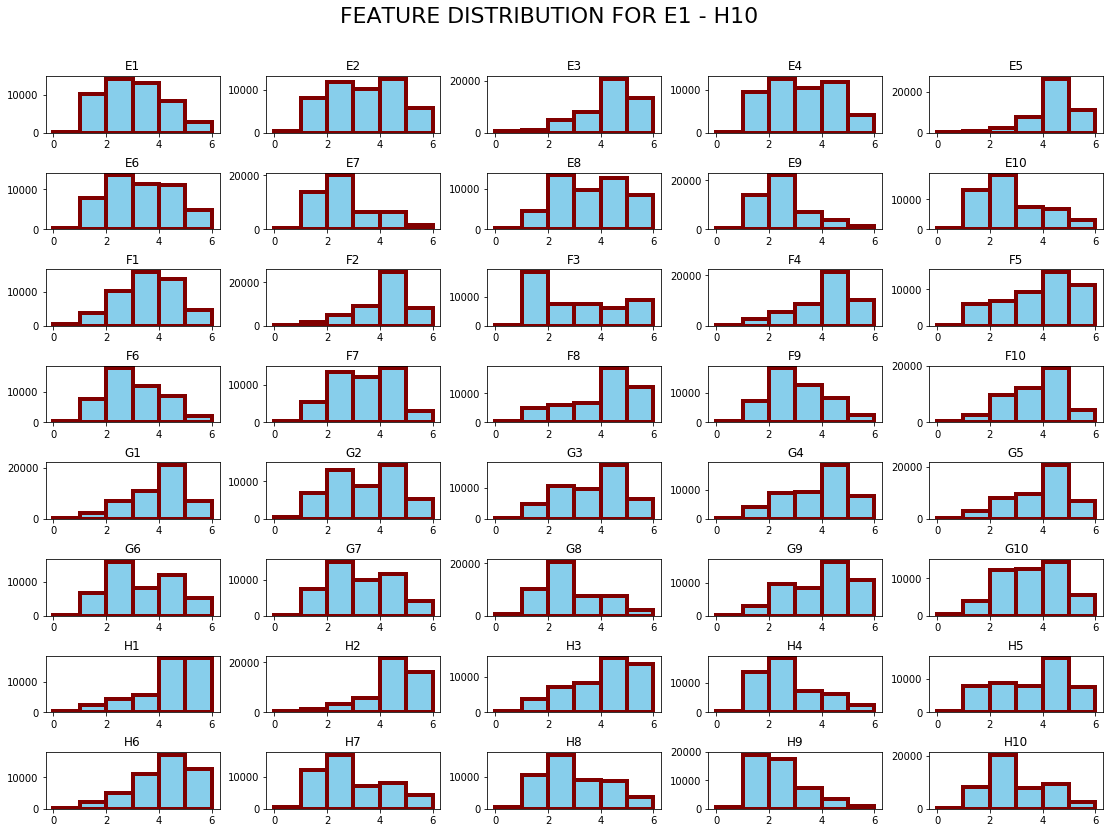

In [13]:
multi_hists(df[gen_col_list('EFGH')], 5, 'FEATURE DISTRIBUTION FOR E1 - H10', color='skyblue', ec='maroon', bins=feat_bins)

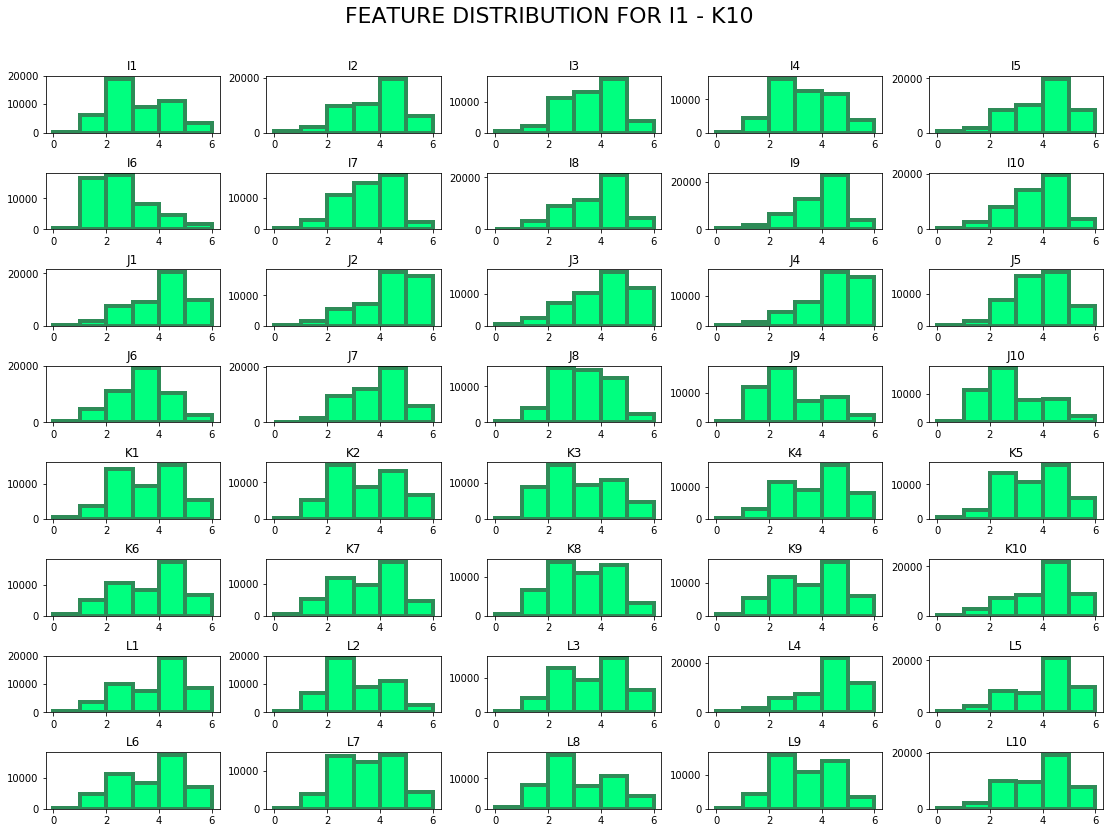

In [14]:
multi_hists(df[gen_col_list('IJKL')],5,'FEATURE DISTRIBUTION FOR I1 - K10',color='springgreen',ec='seagreen',bins=feat_bins)  

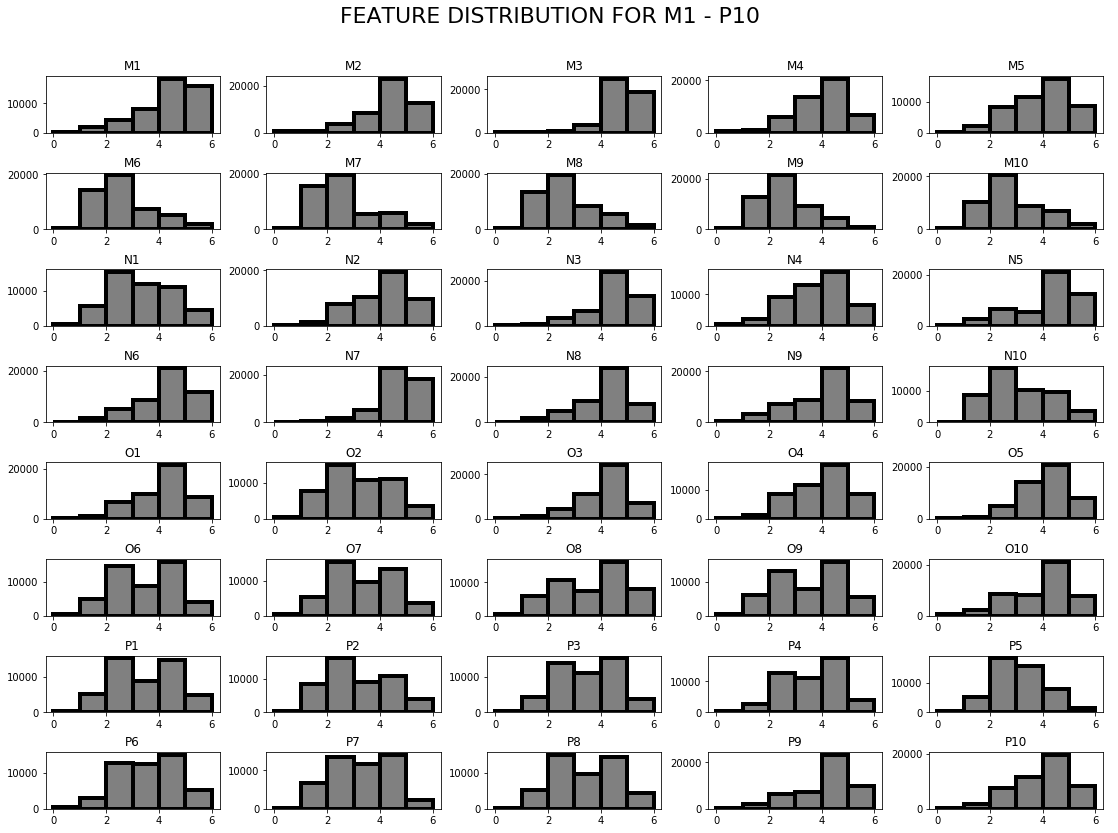

In [15]:
multi_hists(df[gen_col_list('MNOP')], 5, 'FEATURE DISTRIBUTION FOR M1 - P10', color='grey', ec='black', bins=feat_bins)  

Honestly, our features do not look that bad.  A few are heavily skewed to one side or another, some are slightly bimodal, but all in all they're normal enough to not worry about too bad.  If we're going to crank our model to the max it might be worth it to transform or bin the really skewed variables, but that will come later.  Now, for the feature variables:

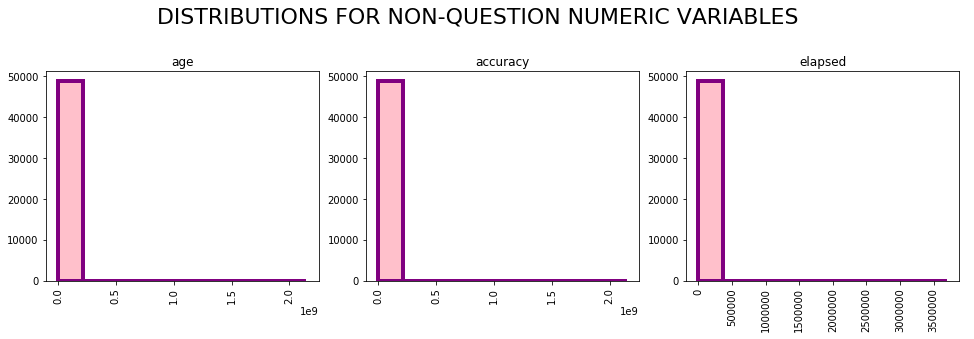

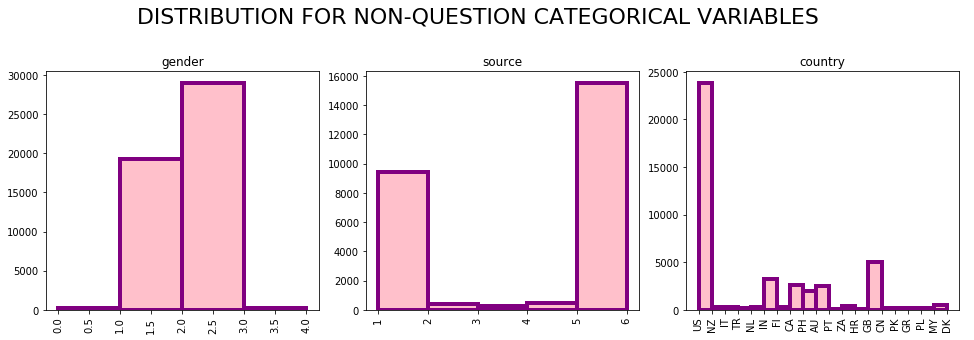

In [16]:
title_d = 0.8

multi_hists(df[['age', 'accuracy', 'elapsed']], 3, 'DISTRIBUTIONS FOR NON-QUESTION NUMERIC VARIABLES', 
            title_dist=title_d, fig_wide=14, fig_height=5, color='pink', ec='purple', rotate_xlabels=True)
multi_hists(df[['gender', 'source', 'country']], 3 , 'DISTRIBUTION FOR NON-QUESTION CATEGORICAL VARIABLES', title_dist=title_d, 
            bins=[list(range(5)), [1,2,3,4,5,6], list(range(20))], fig_wide=14, fig_height=5, 
            color='pink', ec='purple', rotate_xlabels=True)

**Ouch.** Obviously we have some extreme outliers in our *age*, *accuracy*, and *elapsed* target variables.  This is a good indicator that when model building we need to ensure we remove these extreme outliers and which we remove really depends on the specific variable we wish to predict.  We exclude all data outside of (an arbitrarily chosen) 7 standard deviations and plot again:

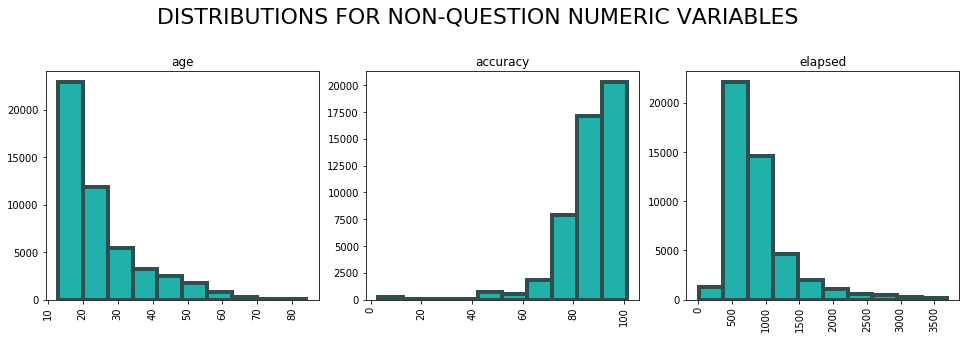

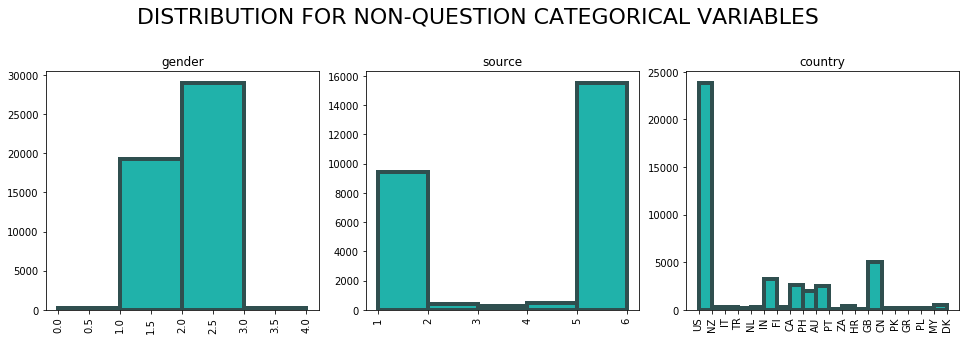

In [17]:
multi_hists(df[['age', 'accuracy', 'elapsed']], 3, 'DISTRIBUTIONS FOR NON-QUESTION NUMERIC VARIABLES', 
            title_dist=title_d, fig_wide=14, fig_height=5, color='lightseagreen', ec='darkslategrey', 
            rotate_xlabels=True, outliers=7)
multi_hists(df[['gender', 'source', 'country']], 3 , 'DISTRIBUTION FOR NON-QUESTION CATEGORICAL VARIABLES', title_dist=title_d, 
            bins=[[0,1,2,3,4], [1,2,3,4,5,6], list(range(20))], fig_wide=14, fig_height=5, 
            color='lightseagreen', ec='darkslategrey', rotate_xlabels=True, outliers=7)

Honestly, that's a lot better.  Important to note that *age* and *elapsed* are skewed right and accuracy is skewed left.  *Gender* is pretty imbalanced with a lot more females than males and a lot more males than non-binary people taking the test.  *Country* and *source* are also heavily imbalanced.  This is a good indication that we will need to tune our models specifically to try to mitigate these imbalances

<a id="country_cloud"></a>
## Exploring the Features - Countries of Origin

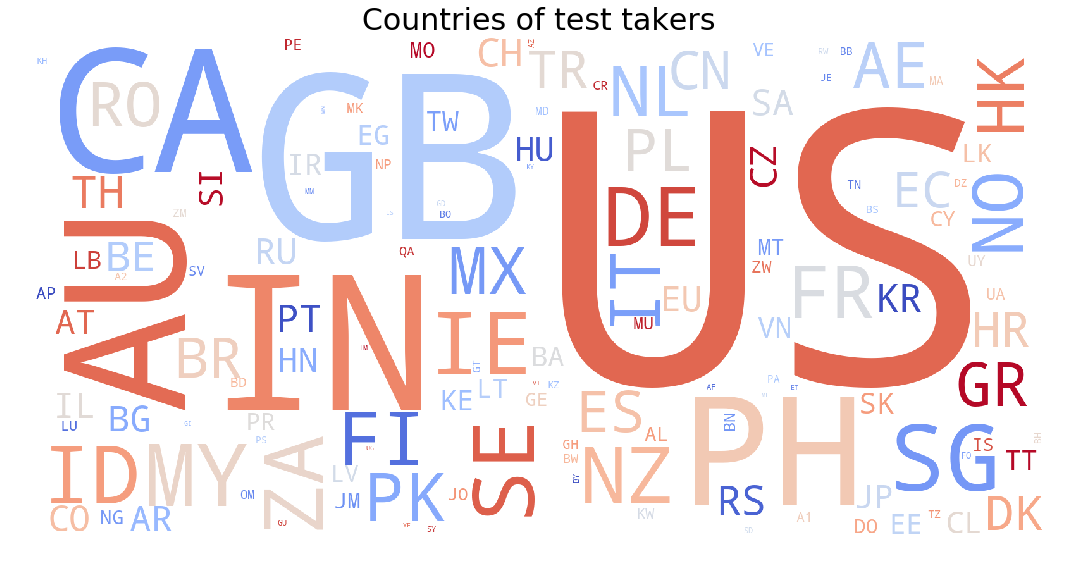

In [18]:
from wordcloud import WordCloud

# create dictionary of countries and use it to build wordcloud
countries = dict()
for place in df.country:
    countries[str(place)] = countries.get(place, 0)+1.0
wordcloud = WordCloud(width = 1600, height = 800, background_color ='white', min_font_size = 10, 
                      colormap=plt.cm.coolwarm).fit_words(countries)
  
# plot the wordcloud                        
plt.figure(figsize = (16, 8), facecolor = None)
plt.title("Countries of test takers", fontsize=30)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 1.2) 
plt.show() 

Looking at the wordcloud for the country codes, it's clear that the vast majority of the data collected are from Anglosphere countries.  The US and Great Britain are the most represented by far with Canada coming in heavy as well.  Additionally, the two biggest non-Anglosphere countries are India and the Philippines--both countries that were former colonial territories of Anglosphere countries.  This is important to note, as generalizing predictions outside of these Anglo countries may not be appropriate or accurate.

<a id="norm_vars"></a>
## Normalizing Continuous Variables

Certain methods perform better the more Gaussian your continuous numeric variables are distributed.  All three continuous numeric variables are transformed via Box-Cox transformation.

In [19]:
from scipy.stats import boxcox

df['sqrtbox_age'] = np.sqrt(boxcox(df.age, 0))
df['box_accuracy'] = boxcox(df.accuracy, -0.35)
df['box_elapsed'] = boxcox(df.elapsed, 0.1)

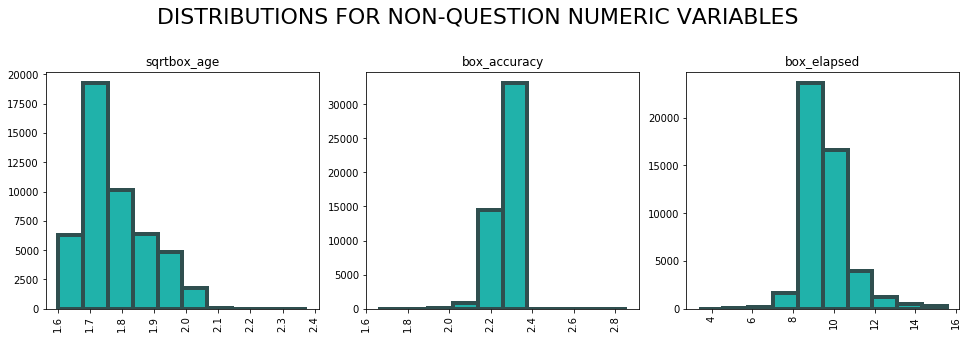

In [20]:
multi_hists(df[['sqrtbox_age', 'box_accuracy', 'box_elapsed']], 3, 'DISTRIBUTIONS FOR NON-QUESTION NUMERIC VARIABLES', 
            title_dist=title_d, fig_wide=14, fig_height=5, color='lightseagreen', ec='darkslategrey', 
            rotate_xlabels=True, outliers=7)

*Age* and *accuracy* transformed are more normal than untransformed but still a little skewed.  *Elapsed* transformed looks very nearly normal.

<a id="gender_cross"></a>
## Feature / Gender Crosstabulation

In [21]:
def multi_cross(df, crossed_col, plot_cols, title, fig_wide=16, fig_height=12, title_size=22, title_dist=0.9):
    '''
    Plots all of the columns of a dataframe as subplots
    
    df:              dataframe to plot columns for
    title:           title of group of plots
    fig_wide:        figure width
    fig_height:      figure height
    title_size:      title size
    title_dist:      adjusts title distance from subplots
    color:           inside color of bars
    ec:              outline color of bars
    ec_width:        width of outline color
    bins:            list of bin lists, 1 needed for each column in df
    outliers:        removes all datapoints outside of *outliers* standard deviations from mean
    quant_cutoff:    sets quantile cutoff limit prior to selecting outliers.  Used to ensure mega massive
                     outliers do not significantly increase mean and standard deviation before calculating outliers
    rotate_xlabels:  rotate x-axis labels sideways
    '''
    size = df.shape[1]
    row_num = int(np.ceil(size/plot_cols))
    fig = plt.figure(figsize=(fig_wide,fig_height))
    plt.axis('off')
    plt.suptitle(title, fontsize=title_size)
    for i, name in enumerate(df):
        ax=fig.add_subplot(row_num,plot_cols,i+1)
        cross = pd.crosstab(df[name], crossed_col)
        plt.plot(cross)
        ax.set_title(name)
    plt.tight_layout(w_pad=0.5, h_pad=1.0)
    plt.subplots_adjust(top=title_dist)
    plt.show()

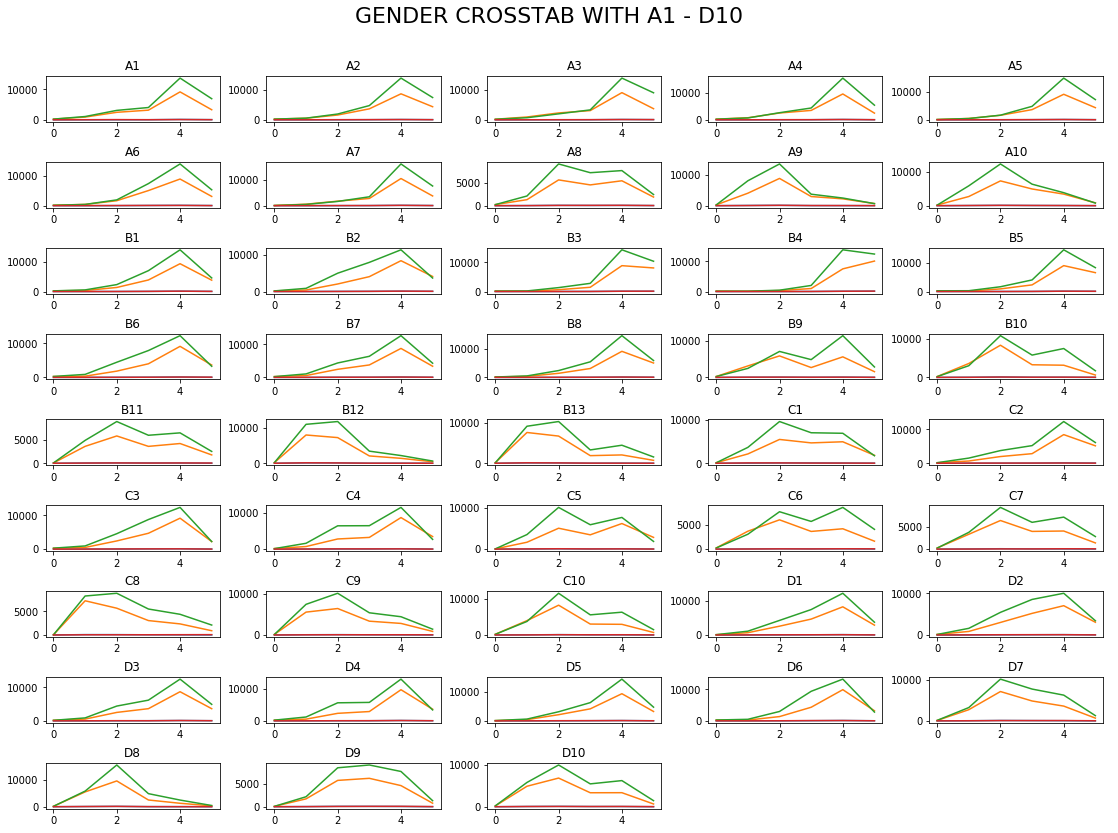

In [22]:
multi_cross(df[gen_col_list('ABCD', [10,13,10,10])], df.gender, 5, 'GENDER CROSSTAB WITH A1 - D10')

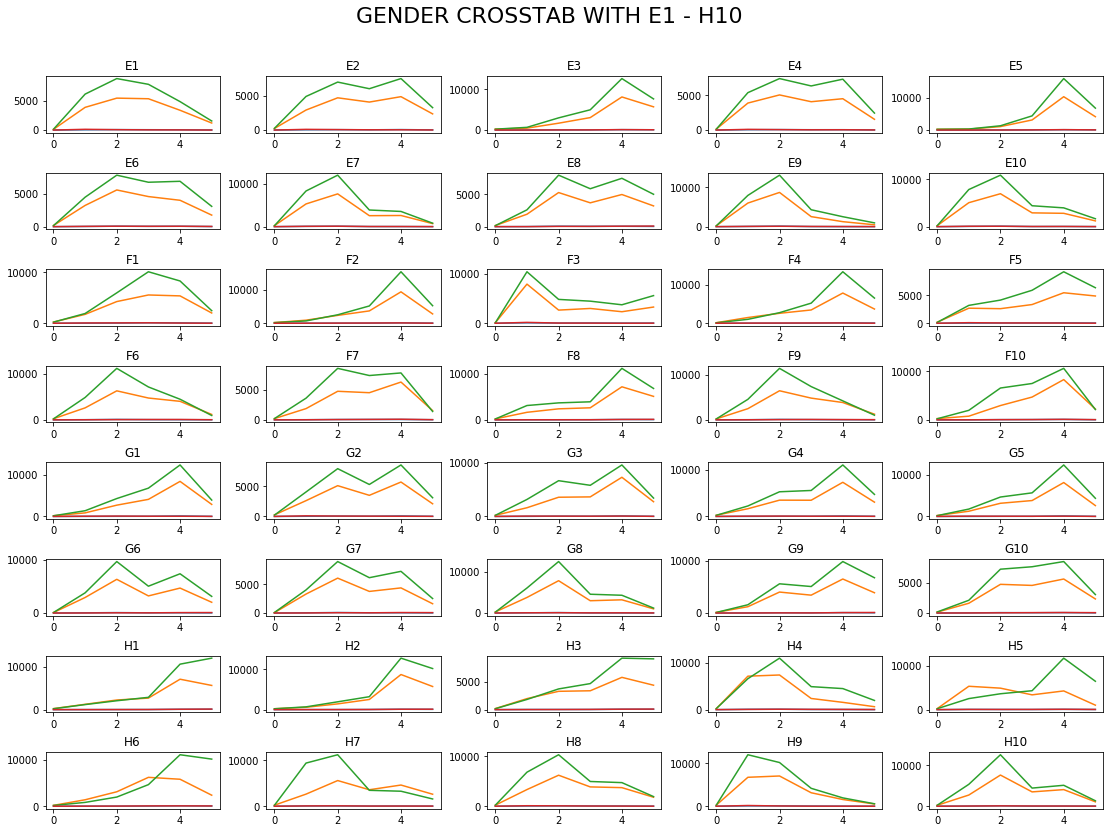

In [23]:
multi_cross(df[gen_col_list('EFGH')], df.gender, 5, 'GENDER CROSSTAB WITH E1 - H10')

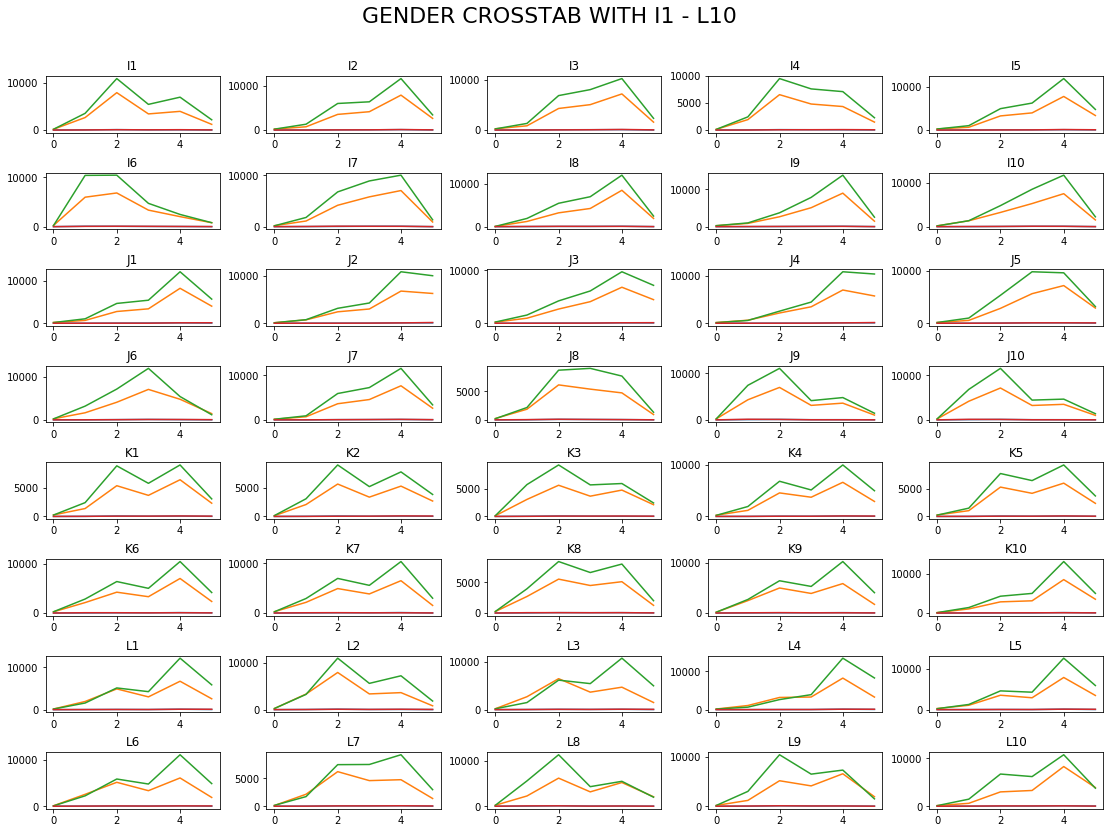

In [24]:
multi_cross(df[gen_col_list('IJKL')], df.gender, 5, 'GENDER CROSSTAB WITH I1 - L10')

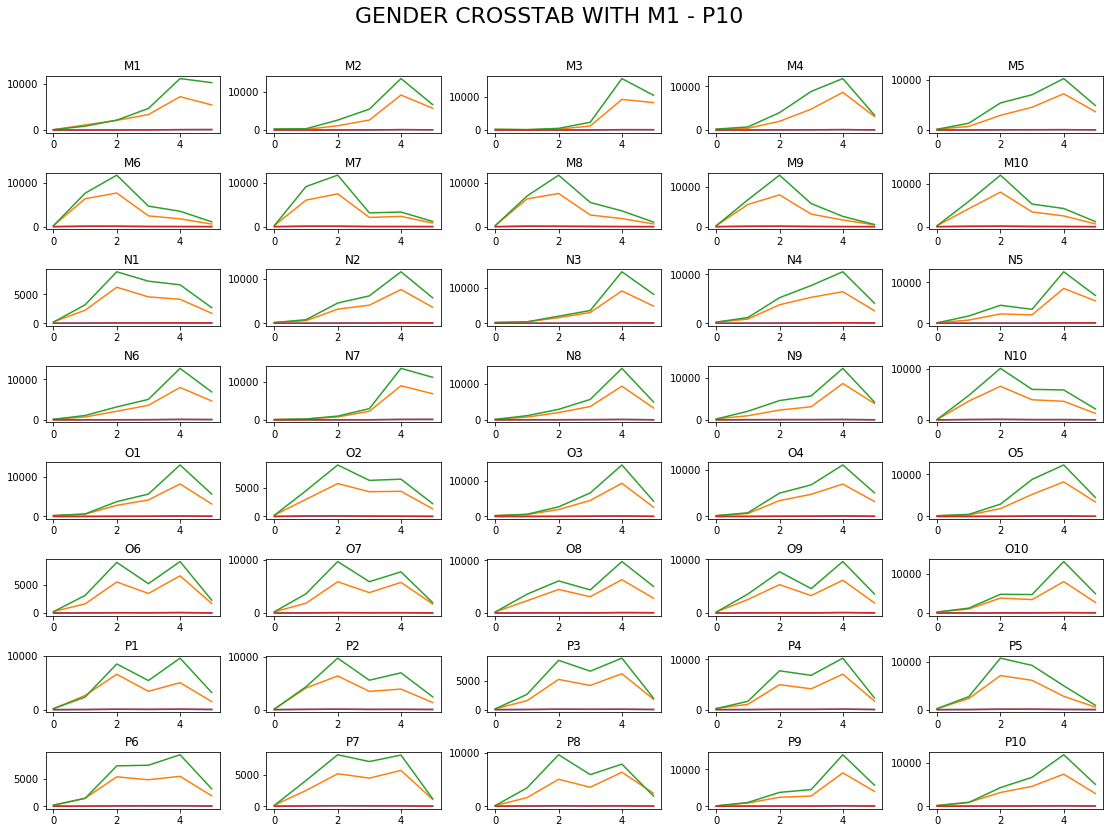

In [25]:
multi_cross(df[gen_col_list('MNOP')], df.gender, 5, 'GENDER CROSSTAB WITH M1 - P10')

In general, it appears that men and women have same general distribution of answers but there are some wildly divergent questions as well.  Crosstabs like H7/Gender (and a few others) have completely flipped distributions between the sexes.  Hopefully this will provide enough distinction to allow for highly accurate predictions.

<a id="source_cross"></a>
## Feature / Source Crosstabulation

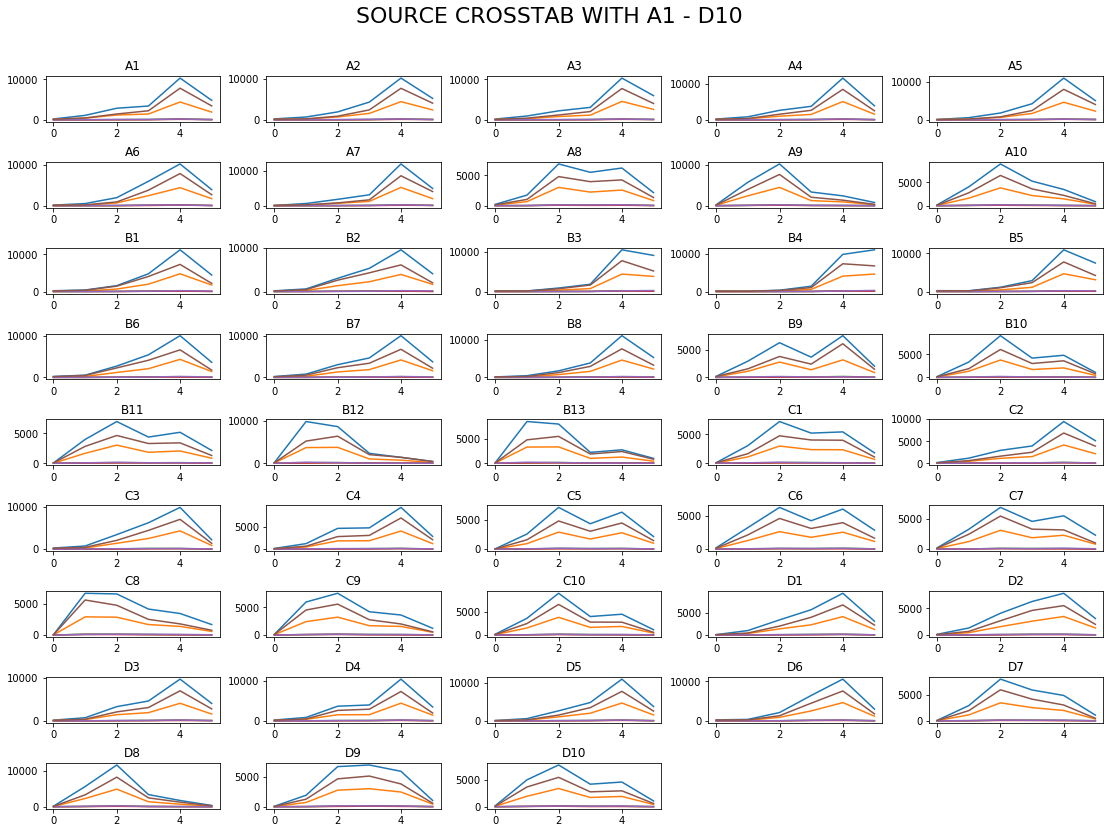

In [26]:
multi_cross(df[gen_col_list('ABCD', [10,13,10,10])], df.source, 5, 'SOURCE CROSSTAB WITH A1 - D10')

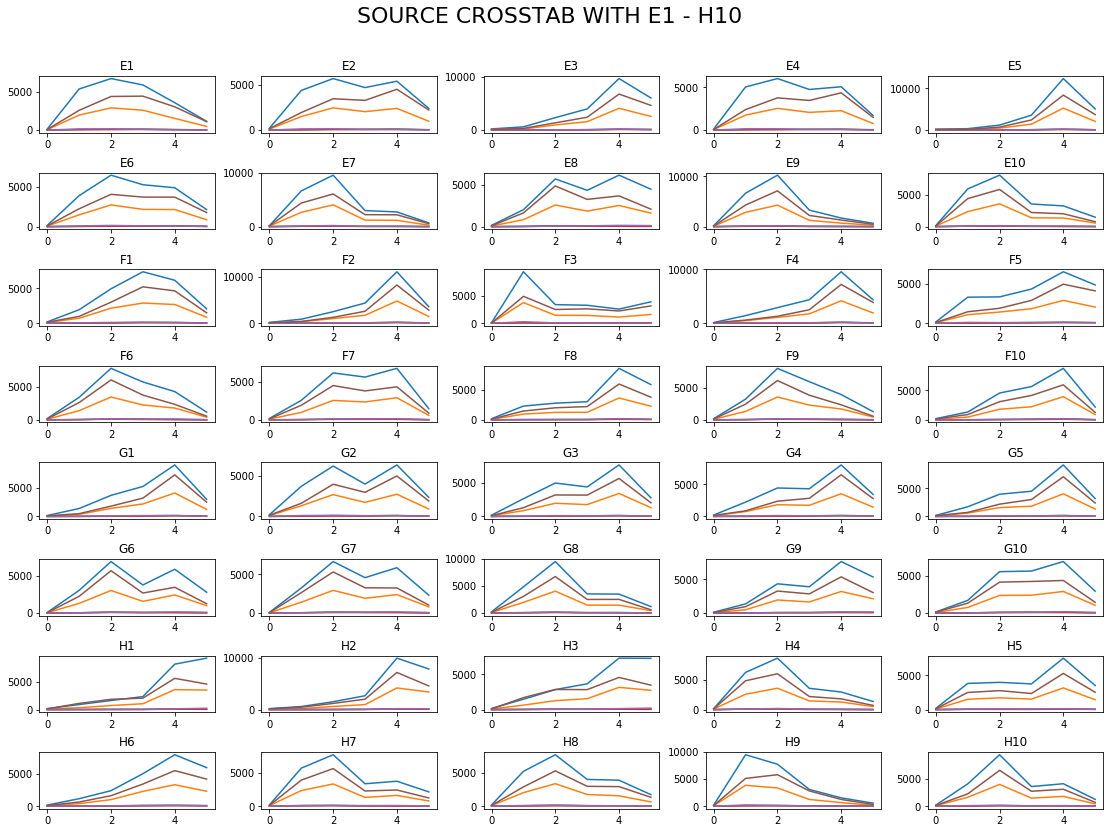

In [27]:
multi_cross(df[gen_col_list('EFGH')], df.source, 5, 'SOURCE CROSSTAB WITH E1 - H10')

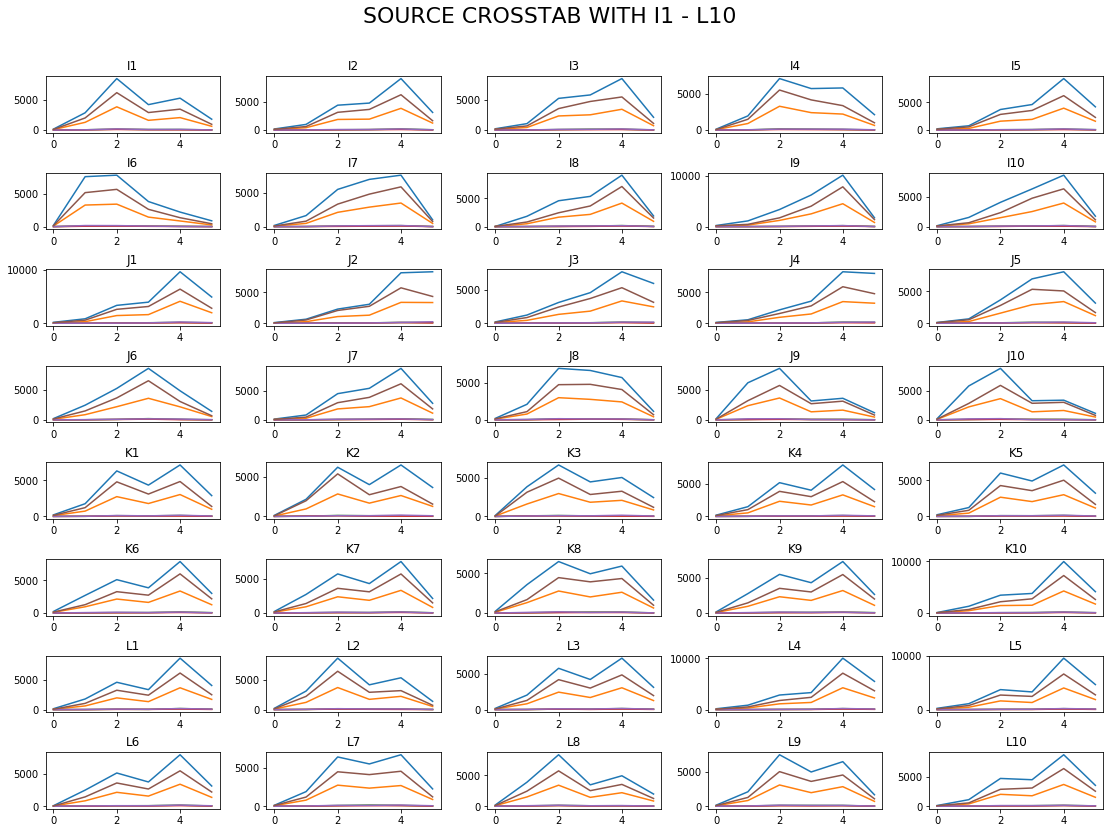

In [28]:
multi_cross(df[gen_col_list('IJKL')], df.source, 5, 'SOURCE CROSSTAB WITH I1 - L10')

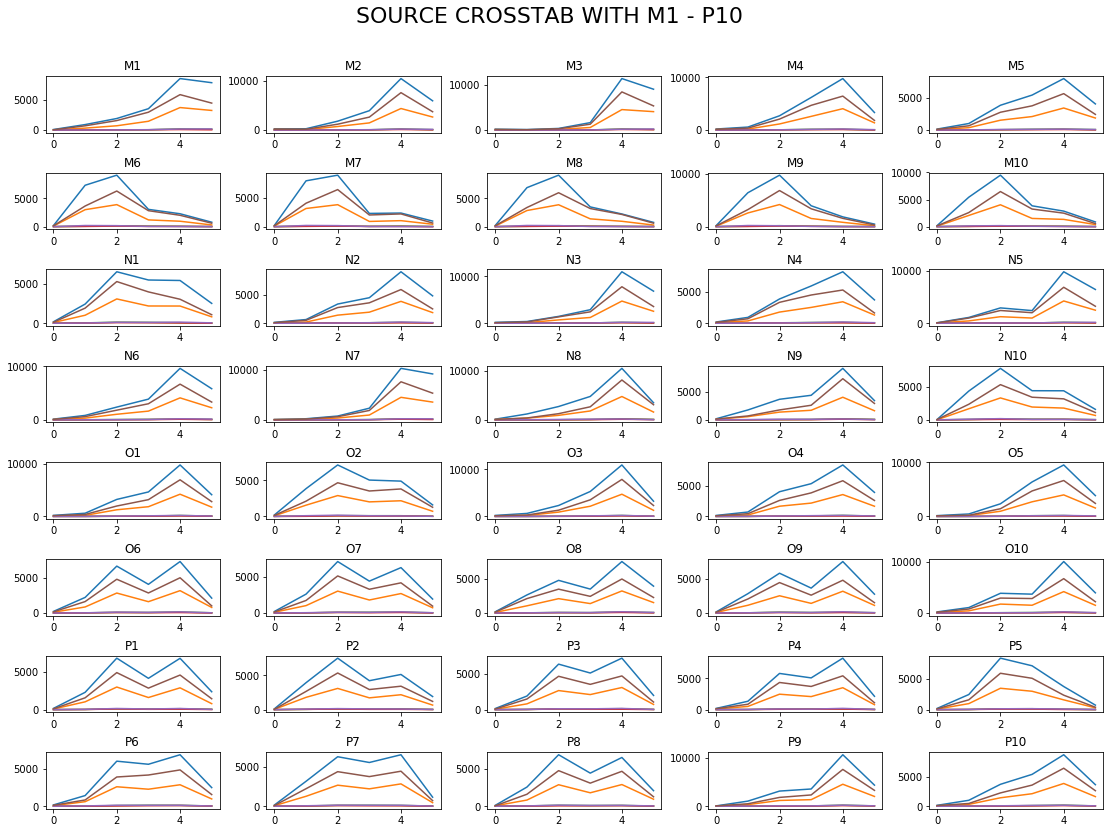

In [29]:
multi_cross(df[gen_col_list('MNOP')], df.source, 5, 'SOURCE CROSSTAB WITH M1 - P10')

Differently than with *gender*, the crosstabs between *source* and personality features almost all look they have similar distributions.  This will make it a bit harder to predict *source* from the personality features but hopefully multi-feature interactions have more distinct distributions with *source*.

<a id="age_crosstab"></a>
## Feature / Age Crosstabulation

In order to better crosstab *age* with the features, *age* is binned into quintiles (5 approximately equally sized cuts).

Text(0.5, 1.0, 'Age binned into quintiles')

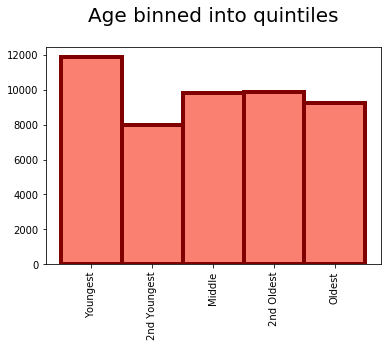

In [30]:
df['bin_age'] = pd.qcut(df['age'], 5, labels=False)
plt.hist(df.bin_age, bins=list(range(6)), color='salmon', ec='maroon', linewidth=4)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=['Youngest', '2nd Youngest', 'Middle', '2nd Oldest', 'Oldest'], rotation=90)
plt.title('Age binned into quintiles', fontsize=20, pad=25)

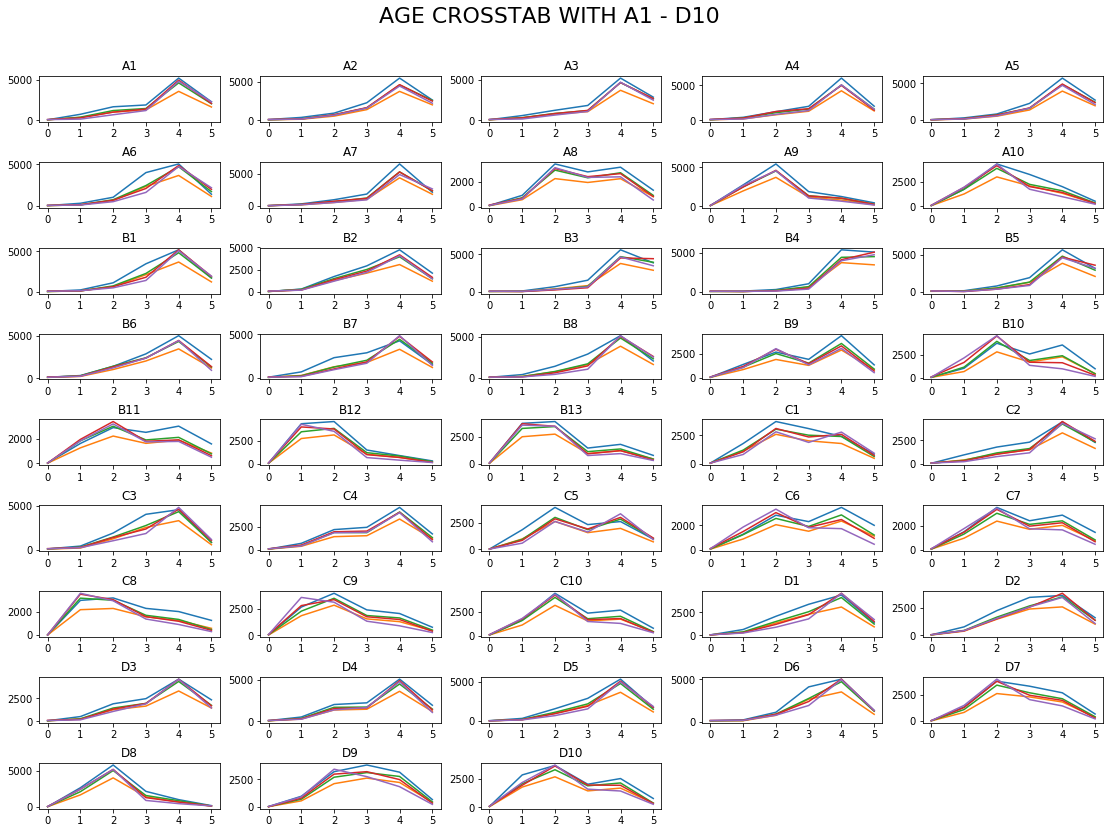

In [31]:
multi_cross(df[gen_col_list('ABCD', [10,13,10,10])], df.bin_age, 5, 'AGE CROSSTAB WITH A1 - D10')

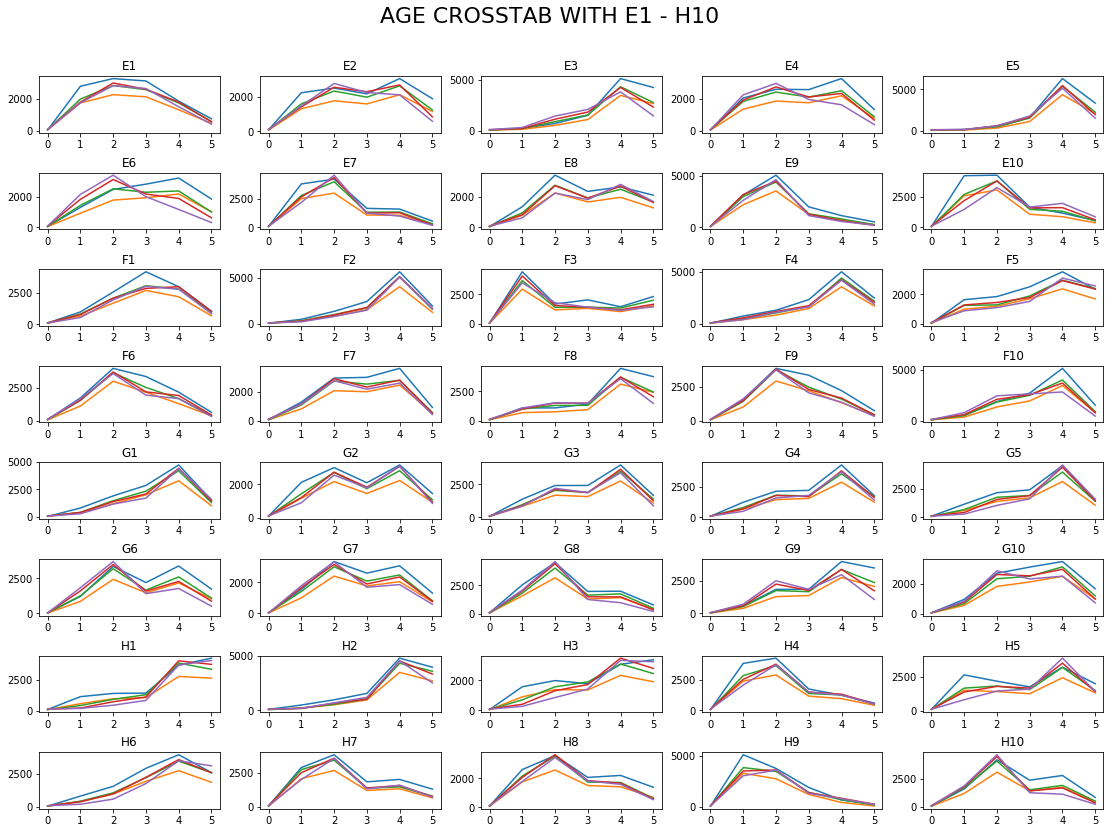

In [32]:
multi_cross(df[gen_col_list('EFGH')], df.bin_age, 5, 'AGE CROSSTAB WITH E1 - H10')

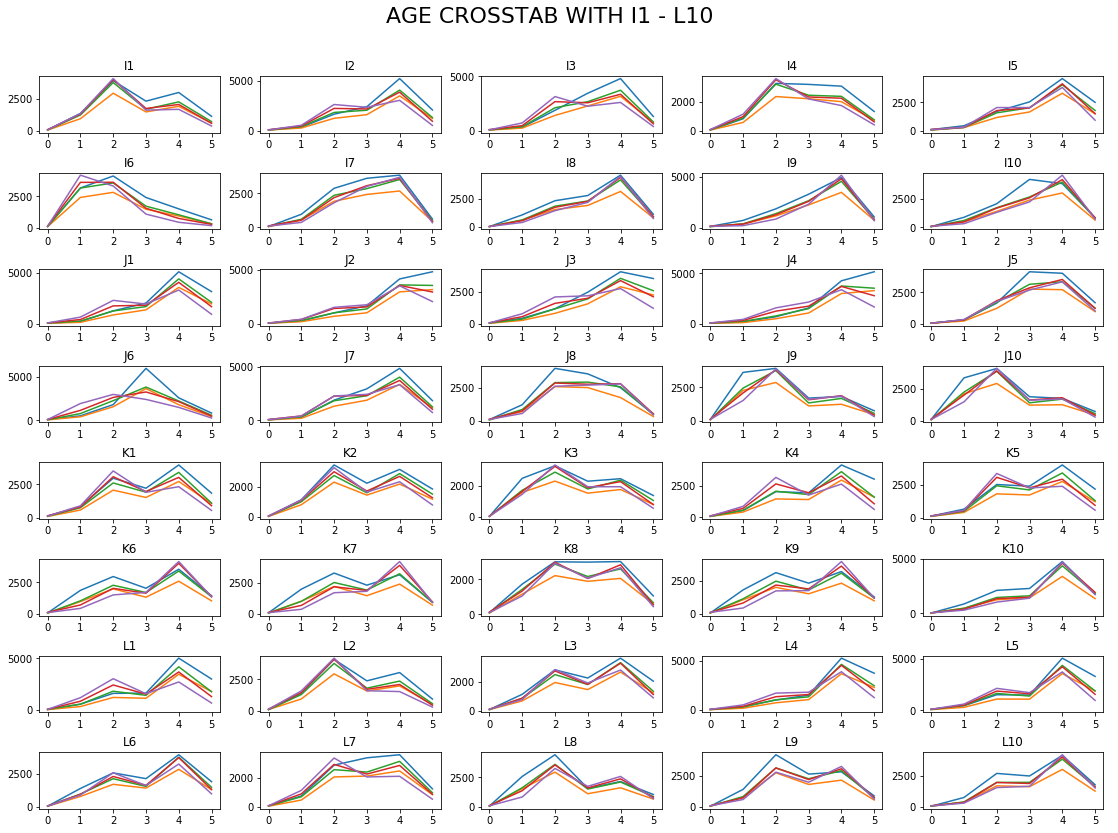

In [33]:
multi_cross(df[gen_col_list('IJKL')], df.bin_age, 5, 'AGE CROSSTAB WITH I1 - L10')

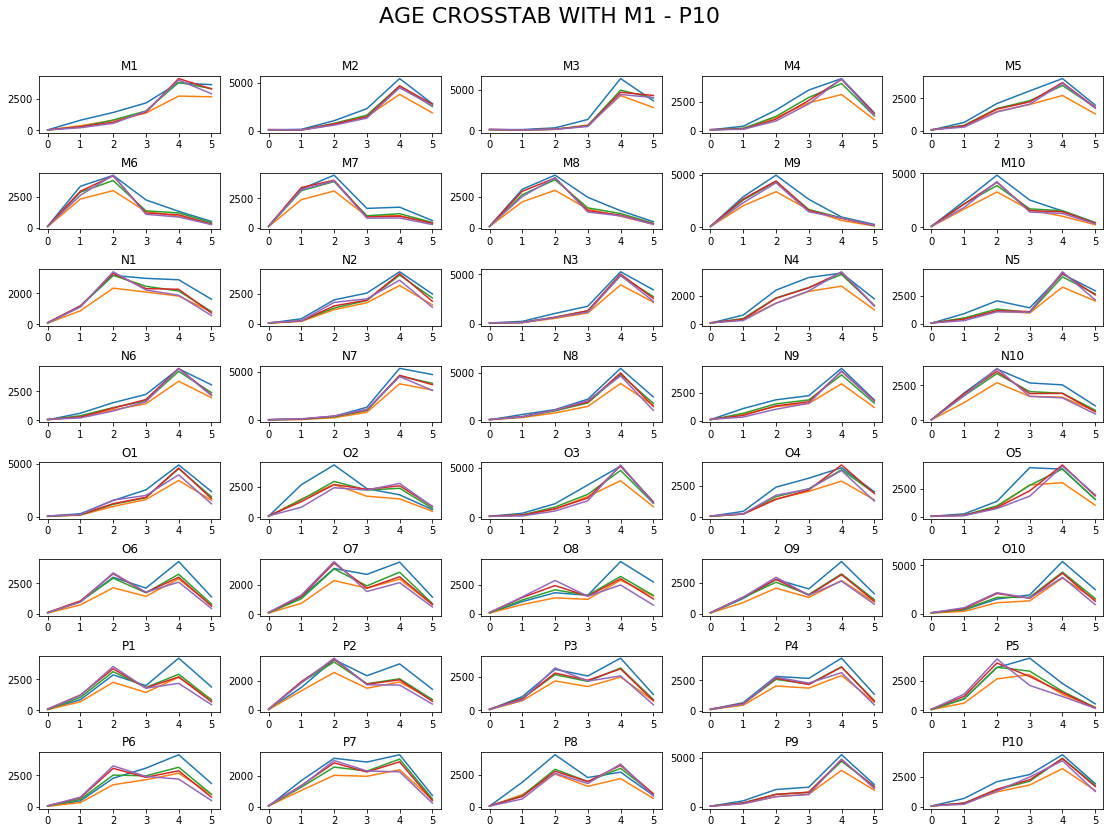

In [34]:
multi_cross(df[gen_col_list('MNOP')], df.bin_age, 5, 'AGE CROSSTAB WITH M1 - P10')

Combing through all of the crosstab graphs above show that most age groups are distributed relatively the same across the 5 age groups, however, there are exceptions in a lot of graphs for 1 or 2 age groups with a different distribution.  Hopefully these small differences across all 163 features gives us ample information to predict age--especially if we want to predict age by regression instead of binning age first.

<a id="country_cross"></a>
## Feature / Country Crosstabulation

In order to make the crosstabulation meaningful, they will be grouped into 'US', 'GB', 'Anglo' ('CA' and 'AU'), 'IN', 'PH', and 'Other.'  Crosstabs with all countries wouldn't produce perceptable results.

Text(0.5, 1.0, 'Distribution of counts for country groups')

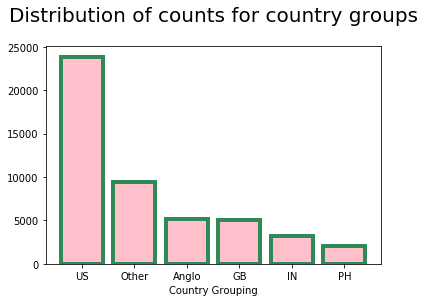

In [35]:
def country_groups(country):
    country_agg = {'US': 'US', 'GB': 'GB', 'AU': 'Anglo', 'CA': 'Anglo', 'IN': 'IN', 'PH': 'PH'}
    return country_agg.get(country, 'Other')

df['bin_country']=df.country.apply(country_groups)

country = df.bin_country.value_counts()
labels = country.index.tolist()
country_list = country.tolist()

plt.bar(labels, country_list, color='pink', ec='seagreen', linewidth=4)
plt.xlabel('Country Grouping')
plt.title('Distribution of counts for country groups', fontsize=20, pad=25)

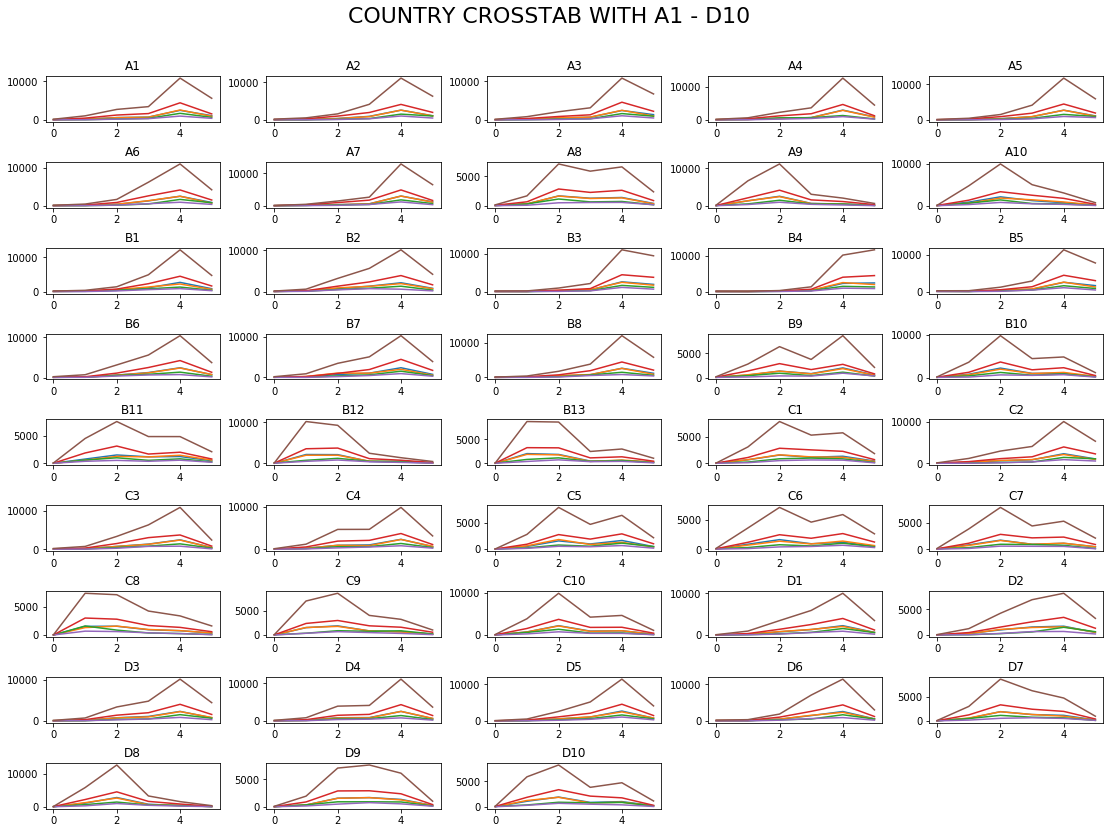

In [36]:
multi_cross(df[gen_col_list('ABCD', [10,13,10,10])], df.bin_country, 5, 'COUNTRY CROSSTAB WITH A1 - D10')

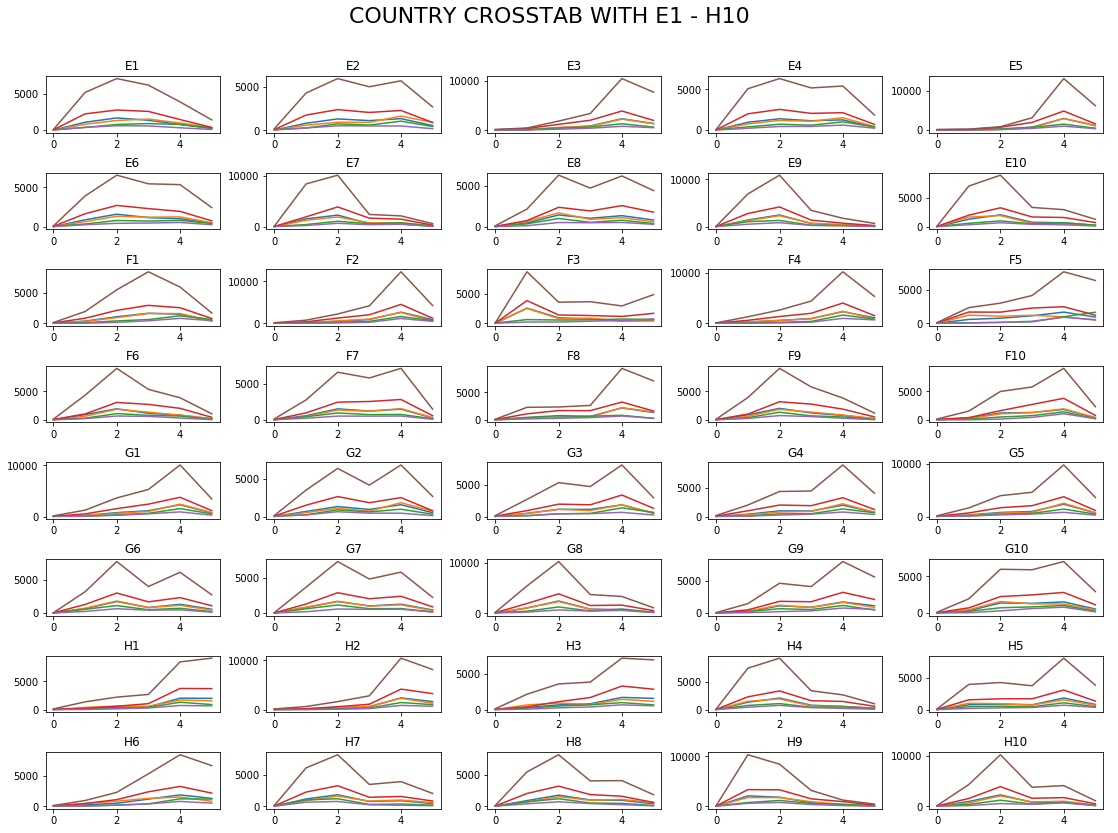

In [37]:
multi_cross(df[gen_col_list('EFGH')], df.bin_country, 5, 'COUNTRY CROSSTAB WITH E1 - H10')

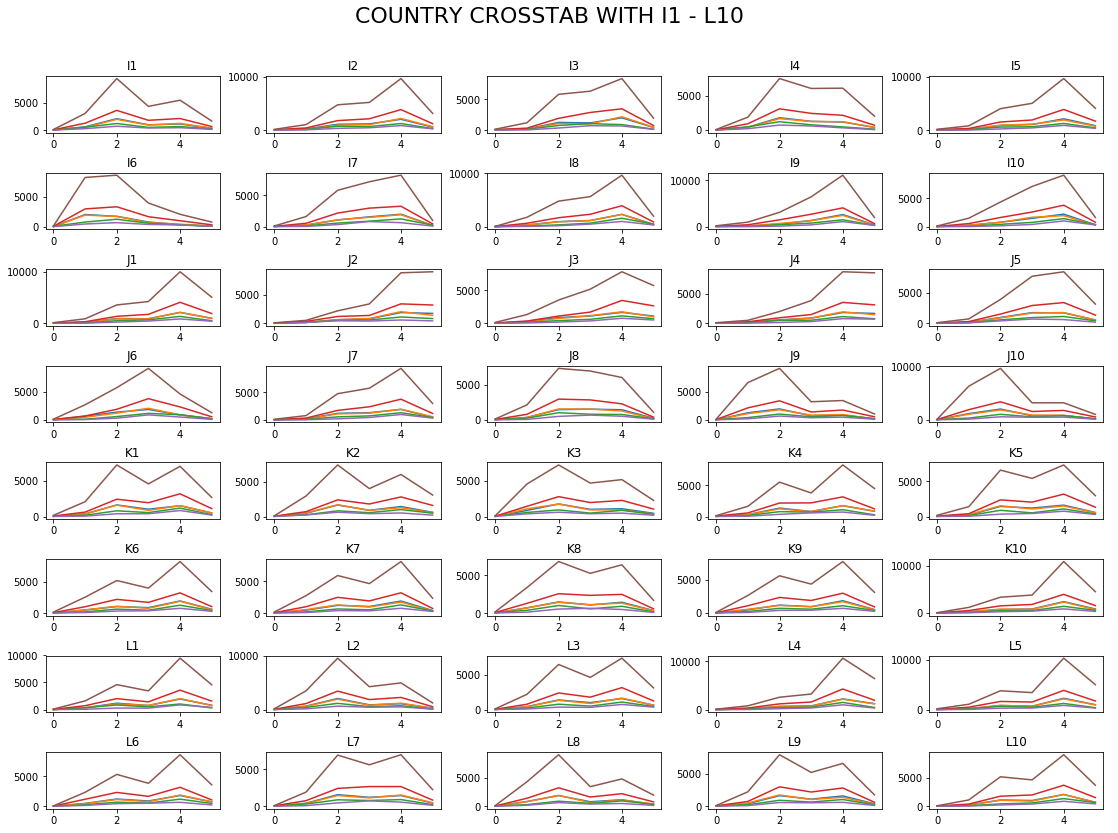

In [38]:
multi_cross(df[gen_col_list('IJKL')], df.bin_country, 5, 'COUNTRY CROSSTAB WITH I1 - L10')

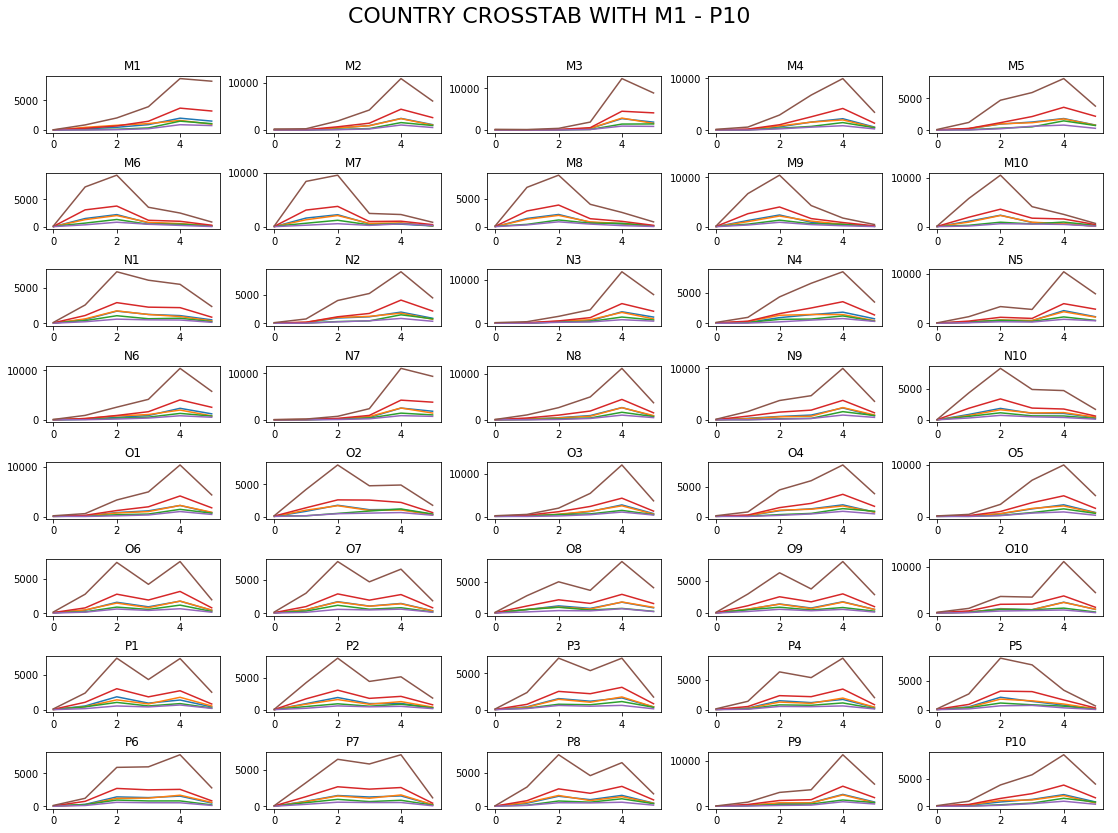

In [39]:
multi_cross(df[gen_col_list('MNOP')], df.bin_country, 5, 'COUNTRY CROSSTAB WITH M1 - P10')

Judging by these country / feature crosstabs, it's clear that the US is extremely dominant compared to every other country.  This means that it will most likely be very hard to predict country from features because of the huge imbalance.
<a id="save"></a>
## Saving the Data

This is it for the exploration.  Normally I wouldn't graph every feature if there were hundreds of features but it was done here for demostration and because I think it looks pretty.  No further transformations of the data will be done here but further transformations (such as binning the features or one-hot encoding) them be done further in the model building phase. Furthermore, invalid datapoints will be cut from the data dependent on the specific target variables in the model building phase.  As an example, if someone has an absolutely ridic age given and we're trying to predict age--drop it fo sho.  If we're not using age anywhere in the model and the rest of features/targets are valid?  Keep it mos def.  

**Thank you for coming to my TED talk**

In [40]:
df.to_csv('C:/Data/Datasets/Random/Personality/data/data_trans.csv', sep=',', index=False, encoding='utf-8')

![](https://thumbs.gfycat.com/MistySilentArgusfish-max-1mb.gif)